In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Find out the unique number of high level class.
df.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [4]:
# Actual class count of animals
df.groupby(['class_type']).size()

class_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
dtype: int64

In [5]:
# Excluded animal name & class type columns for further processing
df_temp = df.iloc[:,1:-1]
df_temp

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
# Normalize the data 
data_scaled = normalize(df_temp)
df_scaled = pd.DataFrame(data_scaled, columns=df_temp.columns)
df_scaled.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.208514,0.0,0.000000,0.208514,0.0,0.000000,0.208514,0.208514,0.208514,0.208514,0.0,0.000000,0.834058,0.000000,0.0,0.208514
1,0.208514,0.0,0.000000,0.208514,0.0,0.000000,0.000000,0.208514,0.208514,0.208514,0.0,0.000000,0.834058,0.208514,0.0,0.208514
2,0.000000,0.0,0.377964,0.000000,0.0,0.377964,0.377964,0.377964,0.377964,0.000000,0.0,0.377964,0.000000,0.377964,0.0,0.000000
3,0.208514,0.0,0.000000,0.208514,0.0,0.000000,0.208514,0.208514,0.208514,0.208514,0.0,0.000000,0.834058,0.000000,0.0,0.208514
4,0.204124,0.0,0.000000,0.204124,0.0,0.000000,0.204124,0.204124,0.204124,0.204124,0.0,0.000000,0.816497,0.204124,0.0,0.204124


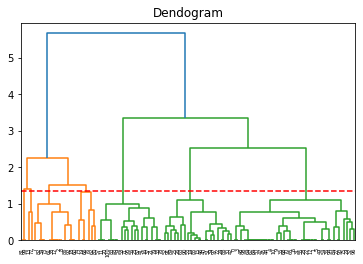

In [7]:
# Number of classes as 7 is already given in the requirement, however a dendogram is drawn to confirm.
plt.title('Dendogram')
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.axhline(y=1.35, color='r', linestyle='--')

In [8]:
# Doing clustering for 7 clusters
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
model.fit(df_scaled)
class_type_predicted=model.labels_
class_type_predicted

array([1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 2, 5, 4, 3, 3, 2, 1, 5, 0, 2, 2,
       1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 2, 5, 1, 1, 2, 5, 3, 3, 2, 3, 2,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 2, 2, 2, 5, 5, 0, 3, 1, 1,
       0, 1, 1, 1, 1, 2, 3, 5, 0, 1, 0, 4, 2, 2, 0, 6, 5, 2, 1, 3, 5, 2,
       3, 3, 3, 3, 5, 1, 1, 2, 1, 3, 1, 6, 2], dtype=int64)

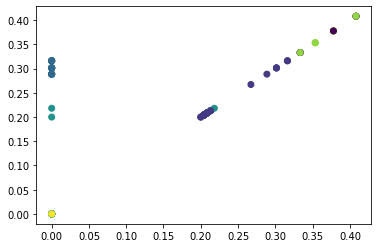

In [9]:
#Plotting the labels
plt.scatter(df_scaled['toothed'], df_scaled['backbone'], c=class_type_predicted) 

In [10]:
# Actual Class
df.class_type.values

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [11]:
# Predicted Class
class_type_predicted

array([1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 2, 5, 4, 3, 3, 2, 1, 5, 0, 2, 2,
       1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 2, 5, 1, 1, 2, 5, 3, 3, 2, 3, 2,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 2, 2, 2, 5, 5, 0, 3, 1, 1,
       0, 1, 1, 1, 1, 2, 3, 5, 0, 1, 0, 4, 2, 2, 0, 6, 5, 2, 1, 3, 5, 2,
       3, 3, 3, 3, 5, 1, 1, 2, 1, 3, 1, 6, 2], dtype=int64)

In [12]:
# FInding MSE for actual and predicted
mean_squared_error(df.class_type.values,class_type_predicted)

2.485148514851485